In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Reviews.csv",nrows=100)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23956\932681074.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanutst...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object

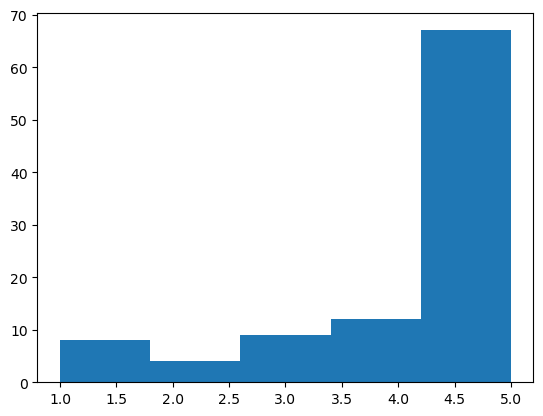

Score
1     8
2     4
3     9
4    12
5    67
Name: Id, dtype: int64


In [3]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [4]:
score_1 = reviews[reviews['Score'] == 1].sample(n=min(9, len(reviews[reviews['Score'] == 1])), replace=False)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(9, len(reviews[reviews['Score'] == 2])), replace=False)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(9, len(reviews[reviews['Score'] == 3])), replace=False)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(9, len(reviews[reviews['Score'] == 4])), replace=False)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(9, len(reviews[reviews['Score'] == 5])), replace=False)


In [5]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

print(reviews_sample.groupby('Score').count().Id)


Score
1    8
2    4
3    9
4    9
5    9
Name: Id, dtype: int64


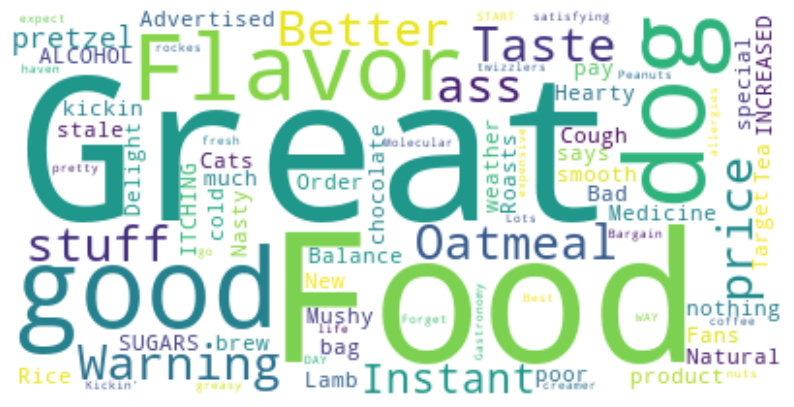

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all summaries into a single string
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(reviews_str)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]
negative_Reviews_str=negative_reviews.Summary.str.cat()
positive_Reviews_str=positive_reviews.Summary.str.cat()

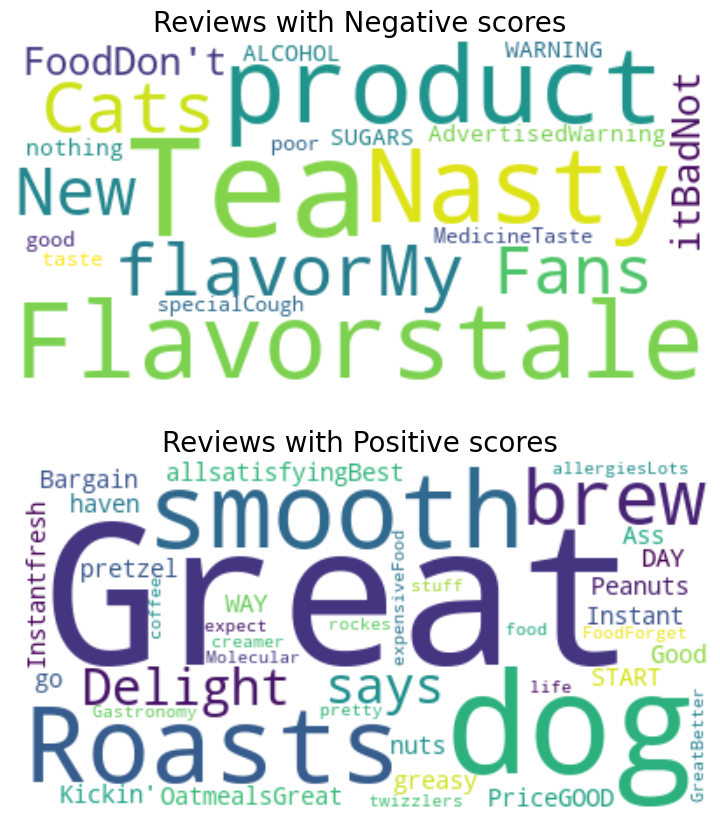

In [8]:
wordcloud_negative=WordCloud(background_color='white').generate(negative_Reviews_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_Reviews_str)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Reviews with Negative scores",fontsize=20)
ax2=fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title("Reviews with Positive scores",fontsize=20)
plt.show()

In [10]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer=SentimentIntensityAnalyzer()


In [11]:
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [12]:
import pandas as pd
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.134,0.602,0.264,0.7880
3,0.000,0.854,0.146,0.4404
4,0.000,0.455,0.545,0.9186


In [13]:
df_c=pd.concat([df.reset_index(drop=True),df_sentiments],axis=1)
df_c.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanutst...,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great staff great price wide assortment mummy ...,0.000,0.455,0.545,0.9186


In [14]:
df_c['Sentiment']=np.where(df_c['compound']>=0, 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanutst...,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880,Positive


Positive    91
Negative     9
Name: Sentiment, dtype: int64


<AxesSubplot:>

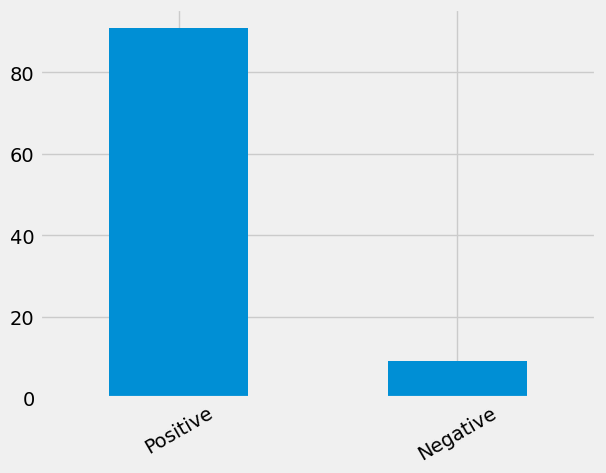

In [16]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar',rot=30)